In [1]:
import math
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
   
    
    data1 =  np.array([
        (288, 149), (288, 129), (270, 133), (256, 141), (256, 157), (246, 157),
        (236, 169), (228, 169), (228, 161), (220, 169), (212, 169), (204, 169),
        (196, 169), (188, 169), (196, 161), (188, 145), (172, 145), (164, 145),
        (156, 145), (148, 145), (140, 145), (148, 169), (164, 169), (172, 169),
        (156, 169), (140, 169), (132, 169), (124, 169), (116, 161), (104, 153),
        (104, 161), (104, 169), (90, 165), (80, 157), (64, 157), (64, 165),
        (56, 169), (56, 161), (56, 153), (56, 145), (56, 137), (56, 129),
        (56, 121), (40, 121), (40, 129), (40, 137), (40, 145), (40, 153),
        (40, 161), (40, 169), (32, 169), (32, 161), (32, 153), (32, 145),
        (32, 137), (32, 129), (32, 121), (32, 113), (40, 113), (56, 113),
        (56, 105), (48, 99), (40, 99), (32, 97), (32, 89), (24, 89),
        (16, 97), (16, 109), (8, 109), (8, 97), (8, 89), (8, 81),
        (8, 73), (8, 65), (8, 57), (16, 57), (8, 49), (8, 41),
        (24, 45), (32, 41), (32, 49), (32, 57), (32, 65), (32, 73),
        (32, 81), (40, 83), (40, 73), (40, 63), (40, 51), (44, 43),
        (44, 35), (44, 27), (32, 25), (24, 25), (16, 25), (16, 17),
        (24, 17), (32, 17), (44, 11), (56, 9), (56, 17), (56, 25),
        (56, 33), (56, 41), (64, 41), (72, 41), (72, 49), (56, 49),
        (48, 51), (56, 57), (56, 65), (48, 63), (48, 73), (56, 73),
        (56, 81), (48, 83), (56, 89), (56, 97), (104, 97), (104, 105),
        (104, 113), (104, 121), (104, 129), (104, 137), (104, 145), (116, 145),
        (124, 145), (132, 145), (132, 137), (140, 137), (148, 137), (156, 137),
        (164, 137), (172, 125), (172, 117), (172, 109), (172, 101), (172, 93),
        (172, 85), (180, 85), (180, 77), (180, 69), (180, 61), (180, 53),
        (172, 53), (172, 61), (172, 69), (172, 77), (164, 81), (148, 85),
        (124, 85), (124, 93), (124, 109), (124, 125), (124, 117), (124, 101),
        (104, 89), (104, 81), (104, 73), (104, 65), (104, 49), (104, 41),
        (104, 33), (104, 25), (104, 17), (92, 9), (80, 9), (72, 9),
        (64, 21), (72, 25), (80, 25), (80, 25), (80, 41), (88, 49),
        (104, 57), (124, 69), (124, 77), (132, 81), (140, 65), (132, 61),
        (124, 61), (124, 53), (124, 45), (124, 37), (124, 29), (132, 21),
        (124, 21), (120, 9), (128, 9), (136, 9), (148, 9), (162, 9),
        (156, 25), (172, 21), (180, 21), (180, 29), (172, 29), (172, 37),
        (172, 45), (180, 45), (180, 37), (188, 41), (196, 49), (204, 57),
        (212, 65), (220, 73), (228, 69), (228, 77), (236, 77), (236, 69),
        (236, 61), (228, 61), (228, 53), (236, 53), (236, 45), (228, 45),
        (228, 37), (236, 37), (236, 29), (228, 29), (228, 21), (236, 21),
        (252, 21), (260, 29), (260, 37), (260, 45), (260, 53), (260, 61),
        (260, 69), (260, 77), (276, 77), (276, 69), (276, 61), (276, 53),
        (284, 53), (284, 61), (284, 69), (284, 77), (284, 85), (284, 93),
        (284, 101), (288, 109), (280, 109), (276, 101), (276, 93), (276, 85),
        (268, 97), (260, 109), (252, 101), (260, 93), (260, 85), (236, 85),
        (228, 85), (228, 93), (236, 93), (236, 101), (228, 101), (228, 109),
        (228, 117), (228, 125), (220, 125), (212, 117), (204, 109), (196, 101),
        (188, 93), (180, 93), (180, 101), (180, 109), (180, 117), (180, 125),
        (196, 145), (204, 145), (212, 145), (220, 145), (228, 145), (236, 145),
        (246, 141), (252, 125), (260, 129), (280, 133)
    ] ) # yapf: disable
     # Locations in block units
    data['locations'] = data1
    data['num_vehicles'] = 1
    data['depot'] = 0
    x,y =  data1.T
    plt.scatter(x,y)
    plt.plot(x,y)
    return data

In [3]:
def compute_euclidean_distance_matrix(locations):
    """Creates callback to return distance between points."""
    distances = {}
    for from_counter, from_node in enumerate(locations):
        distances[from_counter] = {}
        for to_counter, to_node in enumerate(locations):
            if from_counter == to_counter:
                distances[from_counter][to_counter] = 0
            else:
                # Euclidean distance
                distances[from_counter][to_counter] = (int(
                    math.hypot((from_node[0] - to_node[0]),
                               (from_node[1] - to_node[1]))))
    return distances


In [4]:
def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Objective: {}m\n'.format(route_distance)

In [5]:
def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    distance_matrix = compute_euclidean_distance_matrix(data['locations'])

    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return distance_matrix[from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)

Objective: 2790
Route:
 0 -> 1 -> 279 -> 2 -> 278 -> 277 -> 248 -> 247 -> 243 -> 242 -> 241 -> 240 -> 239 -> 238 -> 245 -> 244 -> 246 -> 249 -> 250 -> 229 -> 228 -> 231 -> 230 -> 237 -> 236 -> 235 -> 234 -> 233 -> 232 -> 227 -> 226 -> 225 -> 224 -> 223 -> 222 -> 218 -> 221 -> 220 -> 219 -> 202 -> 203 -> 204 -> 205 -> 207 -> 206 -> 211 -> 212 -> 215 -> 216 -> 217 -> 214 -> 213 -> 210 -> 209 -> 208 -> 251 -> 254 -> 255 -> 257 -> 256 -> 253 -> 252 -> 139 -> 140 -> 141 -> 142 -> 143 -> 199 -> 201 -> 200 -> 195 -> 194 -> 193 -> 191 -> 190 -> 189 -> 188 -> 187 -> 163 -> 164 -> 165 -> 166 -> 167 -> 168 -> 169 -> 171 -> 170 -> 172 -> 105 -> 106 -> 104 -> 103 -> 107 -> 109 -> 110 -> 113 -> 114 -> 116 -> 117 -> 61 -> 62 -> 63 -> 65 -> 64 -> 84 -> 85 -> 115 -> 112 -> 86 -> 83 -> 82 -> 87 -> 111 -> 108 -> 89 -> 90 -> 91 -> 102 -> 101 -> 100 -> 99 -> 98 -> 97 -> 96 -> 95 -> 94 -> 93 -> 92 -> 79 -> 88 -> 81 -> 80 -> 78 -> 77 -> 76 -> 74 -> 75 -> 73 -> 72 -> 71 -> 70 -> 69 -> 66 -> 68 -> 67 -> 57 -> 

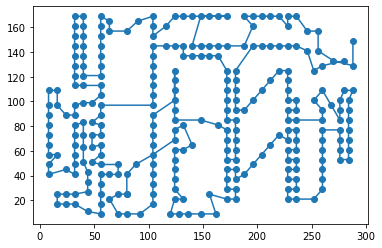

In [6]:
if __name__ == '__main__':
    main()
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
    search_parameters.time_limit.seconds = 30
    search_parameters.log_search = True